# Importing Python Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing functions to find the best model for our dataset 

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# Importing Models  From Sklearn to Train 

In [3]:

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [4]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score

**Loading Dataset**

In [5]:
df = pd.read_csv('creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.corr().head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


In [10]:
df.var().head()

Time    2.255124e+09
V1      3.836489e+00
V2      2.726820e+00
V3      2.299029e+00
V4      2.004684e+00
dtype: float64

**Check For missing values** 

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



**About the data**
* There are 31 columns and 25K+ rows.
* As we can see below there are no missing values in our dataset .
* There are no null values .
* Lastly all the columns contains Numerical values.
* Here class is the target column for us. [ If class = 0 that is a normal transaction and if class = 1 that is fraud transaction ]

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

* As we can see the data is imbalanced 
* The number of 0 [Normal Transaction] > > >  1 [ Fraud Transaction ]
* If we train our model with this dataset our model will give biased result. 


# EDA 


* EDA with Pandas Profiling

In [13]:
#!pip install pandas-profiling 

In [14]:
#please remove the '#' before executing this column 

# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='eda_dataset.html')

**Separating the data for analysis**

In [15]:
normal_transactions = df[df.Class == 0 ]
fraud_transaction = df[df.Class ==1]

In [16]:
print(normal_transactions.shape)
print(fraud_transaction.shape)

(284315, 31)
(492, 31)


* We are taking amount column because using of credit card as normal or fraud can be separated by the amount of money used from that credit card. 

In [17]:
normal_transactions.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud_transaction.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

* As we can see by using describe() function that the mean of fraud transaction is much higher than the mean of normal transactions. 

**Comparing the two columns**

In [19]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


* This comparison of two columns is important for us because we can see the differences of two columns. 
* Our model can learn from this difference and classify which transaction is which

# Balancing the data 
* As we seen before our data is very imbalanced .
* And if we train our models with this imbalanced data it will give us biased output. 
* The number of Normal transaction[ class = 0] > > > Fraud Transaction[class =1]. So our model can take every transaction as normal. 
* Now we will take the same number of data of class  = 0 as class = 1 . 
* We will use under sampling

In [20]:
balanced_sample = df.sample(n = 492)

In [21]:
balanced_sample.shape

(492, 31)

* Now concatenating the two dataframes. 
* balanced_sample and our fraud_transaction 

In [22]:
df2 = pd.concat([balanced_sample,fraud_transaction],axis=0)
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22784,32432.0,1.099563,-0.083008,1.054060,1.636420,-0.780976,0.075912,-0.438885,0.202013,0.980440,...,-0.075146,0.118444,-0.017896,0.412157,0.542060,-0.275205,0.068267,0.023719,5.99,0
198872,132691.0,-1.124829,1.615882,-0.246758,-1.007567,0.794176,-0.388234,0.852613,0.162459,-0.272138,...,-0.252198,-0.636616,-0.118839,-1.025058,-0.115831,0.224957,0.035447,0.208210,7.63,0
82247,59320.0,-1.402592,1.204531,0.852502,0.884028,-0.077990,-0.648121,0.414283,0.157118,-0.936227,...,0.262791,0.767425,0.186294,0.577686,-0.220767,-0.399304,-0.428984,0.123393,17.21,0
265004,161687.0,-0.281890,-0.039618,-0.759138,-1.985531,1.240182,-1.308066,0.980647,-0.275082,-1.953747,...,0.634603,1.567972,-0.443512,0.819854,0.505363,0.204709,0.028001,0.124681,20.00,0
274554,166081.0,1.941689,-0.585406,-0.296023,0.276013,-0.941335,-0.683291,-0.621350,-0.071427,1.561530,...,0.248788,0.915109,0.080108,0.094641,-0.139185,0.179488,0.009557,-0.038701,34.95,0


In [23]:
df2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.00000,984.000000
mean,87891.922764,-2.338042,1.813231,-3.518087,2.195501,-1.566444,-0.609041,-2.824437,0.223001,-1.322765,...,0.385156,0.001500,-0.003327,-0.050757,0.030508,0.029692,0.078501,0.038095,102.79185,0.500000
std,48152.400498,5.508371,3.654388,6.209278,3.249512,4.195686,1.812911,5.837796,4.968244,2.304275,...,2.874664,1.187296,1.155726,0.584149,0.652313,0.474623,1.002820,0.410352,222.02093,0.500254
min,406.000000,-30.552380,-8.402154,-31.103685,-3.937572,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.155661,-7.263482,-1.869290,0.00000,0.000000
25%,47540.000000,-2.784711,-0.198344,-5.084967,-0.206870,-1.825936,-1.530108,-3.119040,-0.193416,-2.338449,...,-0.169856,-0.534377,-0.214412,-0.399037,-0.300804,-0.283741,-0.068912,-0.061107,1.50000,0.000000
50%,78579.000000,-0.765442,0.951244,-1.407349,1.222190,-0.432232,-0.618651,-0.688369,0.172268,-0.778059,...,0.165115,0.028198,-0.033291,0.010986,0.050324,-0.011255,0.048071,0.029798,17.55000,0.500000
75%,134280.000000,1.090377,2.777569,0.368799,4.202830,0.479796,0.131217,0.221360,0.896312,0.128303,...,0.680453,0.593022,0.190722,0.382076,0.402485,0.324074,0.446787,0.211902,99.91000,1.000000
max,172397.000000,2.358701,22.057729,3.233829,12.114672,11.095089,6.474115,5.802537,20.007208,4.456321,...,27.202839,8.361985,5.466230,1.231697,2.208209,2.745261,3.052358,1.954701,2125.87000,1.000000


In [24]:
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95037.038618,0.095865,0.002684,-0.002894,-0.151027,0.018338,0.179655,-0.080144,-0.124634,-0.064406,...,-0.033132,0.056724,-0.011050,0.033653,0.003617,0.019567,0.007735,-0.013573,0.000523,83.372378
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting the Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# input data set -->  x 

X  = df2.drop(columns = 'Class',axis =1)
Y = df2['Class']


In [27]:
print(X.shape)

(984, 30)


**Train Data and Test Data**

In [28]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)
print(X_train.shape, X_test.shape)
print()
print(Y_train.shape, Y_test.shape)

(787, 30) (197, 30)

(787,) (197,)


# Training Our Models 

**Logistic Regression** 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.metrics import RocCurveDisplay

 LR Accuracy score:  93.4010152284264
 LR F1 Score:  93.19371727748691
 LR Precision Score:  95.6989247311828
 LR Recall Score:  90.81632653061224
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

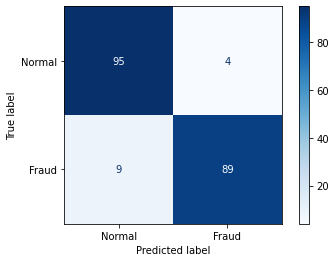

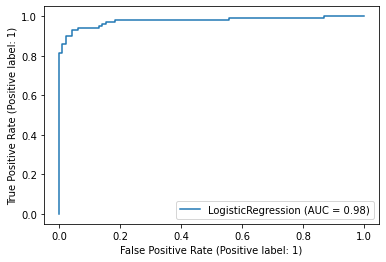

In [31]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)

lr_ac = accuracy_score(Y_test, lr_predict)*100
lr_f1 = f1_score(Y_test,lr_predict)*100
lr_pr = precision_score(Y_test,lr_predict)*100
lr_rec = recall_score(Y_test,lr_predict)*100
    
#confusion Matrix 
cm = confusion_matrix(Y_test, lr_predict)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    
    
print(' LR Accuracy score: ', lr_ac)
print(' LR F1 Score: ',lr_f1)
print(' LR Precision Score: ', lr_pr)
print(' LR Recall Score: ', lr_rec)
print('____________________________________________________________________________________________________________')
print('')
print('Confusion Matrix and ROC Curve')
cmd.plot(cmap=plt.cm.Blues)
    
roc_disp = RocCurveDisplay.from_estimator(lr, X_test,Y_test)

**K Nearest Neighbour**

* Finding the best value for k 

In [32]:

def BestValueForK():
    
    accuracy_list = []
    for i in range(1,21):
        kn = KNeighborsClassifier(n_neighbors=i)
        kn.fit(X_train, Y_train)
        kn_predict = kn.predict(X_test)
        kn_ac = accuracy_score(Y_test, kn_predict)
        accuracy_list.append(kn_ac)
        
    max_accuracy = max(accuracy_list)
    print('Best value for K is : ', accuracy_list.index(max_accuracy))
    

BestValueForK()
        
        

Best value for K is :  8


 KNN Accuracy Score :  64.9746192893401
 KNN F1 score:  61.01694915254237
 KNN Precision Score:  68.35443037974683
 KNN Recall Score:  55.10204081632652
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


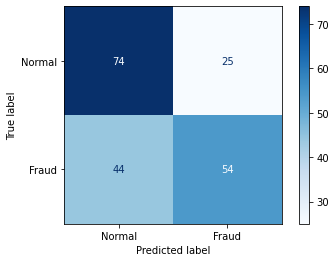

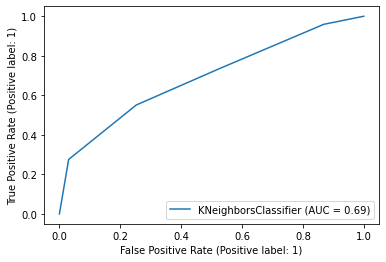

In [33]:

    kn = KNeighborsClassifier(n_neighbors=4)
    kn.fit(X_train, Y_train)
    kn_predict = kn.predict(X_test)
    
    kn_ac = accuracy_score(Y_test,kn_predict)*100
    kn_f1 = f1_score(Y_test, kn_predict)*100
    kn_pr = precision_score(Y_test, kn_predict)*100
    kn_rec = recall_score(Y_test, kn_predict)*100
    
    
    print(' KNN Accuracy Score : ', kn_ac)
    print(' KNN F1 score: ',kn_f1 )
    print(' KNN Precision Score: ',kn_pr)
    print(' KNN Recall Score: ', kn_rec)
    
    #Confusion Matrix and Roc Curve 
    cm = confusion_matrix(Y_test, kn_predict)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    print('____________________________________________________________________________________________________________')
    print('')
    print('Confusion Matrix and ROC Curve')
    cmd.plot(cmap=plt.cm.Blues)
    
    roc_disp = RocCurveDisplay.from_estimator(kn, X_test,Y_test)

**Naive Bayes**

 GNB Accuracy Score :  86.80203045685279
 GNB F1 score:  85.05747126436782
 GNB Precision Score:  97.36842105263158
 GNB Recall Score:  75.51020408163265
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


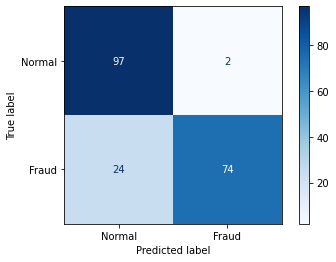

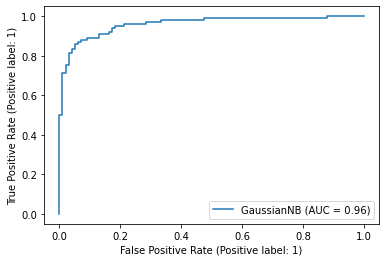

In [34]:

    nb = GaussianNB()
    nb.fit(X_train, Y_train)
    nb_predict = nb.predict(X_test)
    
    nb_ac = accuracy_score(Y_test,nb_predict)*100
    nb_f1 = f1_score(Y_test, nb_predict)*100
    nb_pr = precision_score(Y_test, nb_predict)*100
    nb_rec = recall_score(Y_test, nb_predict)*100
    
    print(' GNB Accuracy Score : ', nb_ac)
    print(' GNB F1 score: ', nb_f1)
    print(' GNB Precision Score: ',nb_pr)
    print(' GNB Recall Score: ', nb_rec)
    
    #Confusion Matrix and Roc Curve 
    
    cm = confusion_matrix(Y_test, nb_predict)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    print('____________________________________________________________________________________________________________')
    print('')
    print('Confusion Matrix and ROC Curve')
    cmd.plot(cmap=plt.cm.Blues)
    
    roc_disp = RocCurveDisplay.from_estimator(nb, X_test,Y_test)
    

**Decision Tree Classifier**

 DTC Accuracy :  89.84771573604061
 DTC F1 Score : 89.13043478260869
 DTC Precission :   95.34883720930233
 DTC Recall Score:  83.6734693877551
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


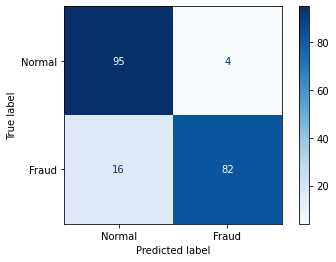

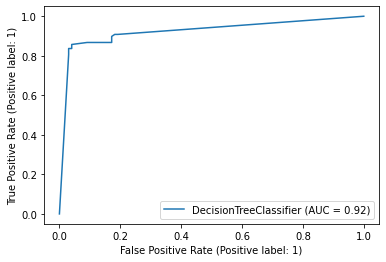

In [35]:

    dt = DecisionTreeClassifier(min_samples_split=20)
    dt.fit(X_train, Y_train)
    dt_predict = dt.predict(X_test)
    
    dt_ac = accuracy_score(Y_test,dt_predict)*100
    dt_f1 = f1_score(Y_test,dt_predict)*100
    dt_pr = precision_score(Y_test,dt_predict)*100
    dt_rec = recall_score(Y_test,dt_predict)*100
    
    print(' DTC Accuracy : ',dt_ac)
    print(' DTC F1 Score :', dt_f1)
    print(' DTC Precission :  ', dt_pr)
    print(' DTC Recall Score: ',dt_rec)
    
    
    #Confusion Matrix and Roc Curve 
    cm = confusion_matrix(Y_test, dt_predict)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    print('____________________________________________________________________________________________________________')
    print('')
    print('Confusion Matrix and ROC Curve')
    cmd.plot(cmap=plt.cm.Blues)
    
    roc_disp = RocCurveDisplay.from_estimator(dt, X_test,Y_test)

**Random Forest Classifier**

 RF Accuracy :  92.38578680203045
 RF F1 Score:  91.97860962566844
 RF Precission:  96.62921348314607
 RF Recall :  87.75510204081633
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


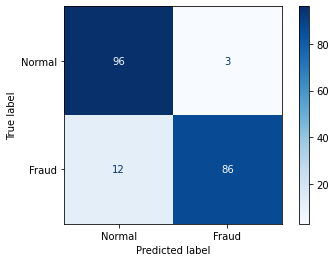

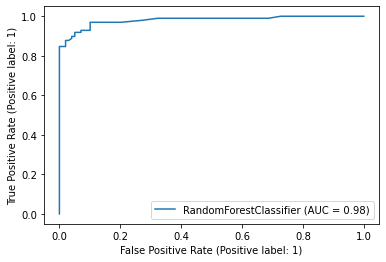

In [36]:

    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, Y_train)
    rf_predict = rf.predict(X_test)
    
    rf_ac = accuracy_score(Y_test,rf_predict)*100
    rf_f1 = f1_score(Y_test,rf_predict)*100
    rf_pr = precision_score(Y_test,rf_predict)*100
    rf_rec = recall_score(Y_test,rf_predict)*100
    
    print(' RF Accuracy : ', rf_ac)
    print(' RF F1 Score: ',rf_f1)
    print(' RF Precission: ',rf_pr)
    print(' RF Recall : ',rf_rec)
    
    #Confusion Matrix and Roc Curve 
    cm = confusion_matrix(Y_test, rf_predict)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    print('____________________________________________________________________________________________________________')
    print('')
    print('Confusion Matrix and ROC Curve')
    cmd.plot(cmap=plt.cm.Blues)
    
    roc_disp = RocCurveDisplay.from_estimator(rf, X_test,Y_test)

# Performance Analysis
* Finding the best model 

In [37]:
result = {
    'Name': ['Logistic Regression','KNN','Random Forest','Decision Tree','Naive Bayes'],
    'Accuracy_Score ': [lr_ac,kn_ac,rf_ac,dt_ac,nb_ac],
    'F1_Score':[lr_f1,kn_f1,rf_f1,dt_f1,nb_f1],
    'Precision_Score ':[lr_pr, kn_pr, rf_pr,dt_pr,nb_pr],
    'Recall_Score':[lr_rec,kn_rec,rf_rec,dt_rec,nb_rec]
}

In [38]:
df3 = pd.DataFrame(result)

In [39]:
df3.head()

,Name,Accuracy_Score,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,93.401015,93.193717,95.698925,90.816327
1,KNN,64.974619,61.016949,68.354430,55.102041
2,Random Forest,92.385787,91.978610,96.629213,87.755102
3,Decision Tree,89.847716,89.130435,95.348837,83.673469
4,Naive Bayes,86.802030,85.057471,97.368421,75.510204


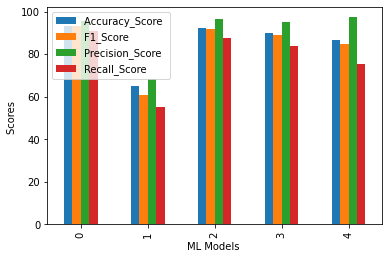

In [40]:
df3.plot(kind= 'bar' )
plt.xlabel('ML Models ')
plt.ylabel('Scores ')
plt.show()

**BAR PLOT**

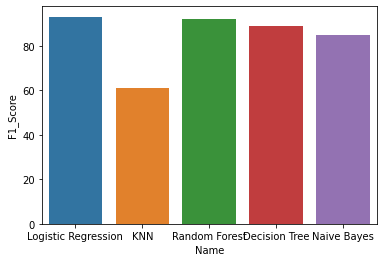

In [41]:
sns.barplot(x= df3.Name, y=df3.F1_Score)
plt.show()

* After training different classification models with our dataset ,we can see that The Accuracy and F1 score is much higher in the Logistic Regression model . 
* So the best model is Logistic Regression.